In [20]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt

In [21]:
data = load_boston()
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

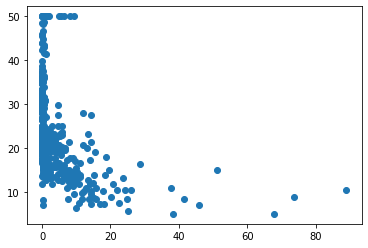

In [22]:
X, y = data['data'], data['target']
plt.scatter(X[:, 0], y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2) #веса одинаковы, близость - евклидово расстояния
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [24]:
knn.predict(X_test)

array([11.44, 27.82,  9.52, 19.76, 18.26, 24.56, 29.4 , 22.78, 20.46,
       21.7 , 20.46, 20.2 , 20.46, 22.62, 22.1 , 23.26, 22.64, 24.06,
       28.08, 20.4 , 27.22, 33.86, 20.62, 16.06, 28.16, 22.3 , 33.24,
       34.1 , 31.26, 18.26, 28.74, 17.4 , 32.1 ,  9.02, 36.38, 35.44,
       26.12, 11.68, 21.86, 21.14, 20.14, 22.2 , 37.9 , 27.06, 35.58,
       12.98, 24.72, 27.66, 11.3 , 24.76, 15.92, 19.1 , 23.84, 29.4 ,
       41.82, 23.62, 22.18, 31.4 , 11.08, 22.26, 20.12, 21.64, 24.94,
       26.78, 24.6 , 13.74, 37.54, 21.42, 11.7 , 16.6 , 14.86, 20.16,
       22.6 , 23.28, 30.32, 33.24, 32.12, 24.66, 29.96, 11.42, 21.68,
       18.04, 39.54, 20.24, 21.84, 29.4 , 29.46, 24.06, 17.5 , 13.58,
       19.96, 18.84, 20.18, 31.02, 21.04, 22.42, 25.02, 22.02, 14.76,
       22.2 , 22.98, 34.02])

We predict the cost of houses

In [25]:
mean_squared_error(y_test, knn.predict(X_test))

32.95366666666666

# Find optimal hyperparameters

In [26]:
from sklearn.model_selection import GridSearchCV

grid_searcher = GridSearchCV(
    KNeighborsRegressor(), 
    param_grid = {
        'n_neighbors': [1,5,10,20],
        'weights': ['uniform', 'distance'],
        'p': [1,2,3] #distance metrics
    },
    cv=5
    )

In [27]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 10, 20], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
grid_searcher.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [29]:
grid_searcher.predict(X_test)

array([10.46272191, 34.44109885,  8.4277294 , 19.77252397, 14.94812207,
       27.85554834, 30.80292428, 20.66688916, 19.21990086, 22.31782563,
       17.97331399, 20.11666757, 19.71665556, 18.52919699, 19.36696952,
       24.76610943, 24.08313361, 26.11716055, 27.43019715, 20.30558686,
       23.35046442, 31.06679577, 21.12364978, 15.86582451, 24.07511735,
       22.78795067, 29.6949787 , 35.74822689, 35.07703739, 16.70367481,
       26.95545442, 18.65916735, 42.54825333,  8.80022062, 38.27424552,
       38.27526582, 19.71951209, 12.91421971, 21.83650331, 22.31739529,
       20.17745611, 21.87981506, 37.27858366, 26.30402995, 34.05694674,
       12.73342025, 24.45030692, 27.42273728, 12.20235042, 26.15427872,
       15.76171938, 20.21622694, 22.5411708 , 31.32520228, 38.62695882,
       27.7416551 , 21.57188107, 30.9113964 , 12.07823291, 22.2165186 ,
       21.17030038, 21.19774595, 25.18174963, 22.42110345, 24.05089276,
       13.33908628, 44.91292302, 19.18708001, 10.66385849, 14.47

In [30]:
mean_squared_error(y_test, grid_searcher.predict(X_test))

25.01717635872573

In [31]:
metrics = []

#as epochs
for n in range(1,30,3):
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  metrics.append(mean_squared_error(y_test, knn.predict(X_test)))

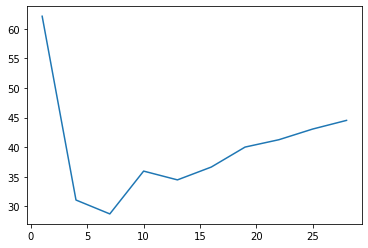

In [32]:
plt.plot(range(1,30,3), metrics)